Research Question:Does the literacy rate play a role in the part-time employment rate? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns

In [23]:
literacy=pd.read_csv('UNdata_Export_20190226_203636225.csv')
employment=pd.read_csv('UNdata_Export_parttime_employment.csv')
display(literacy.head(5))
display(employment.head(5))


,Country or Area,Subgroup,Year,Source,Unit,Value,Value Footnotes
0,Afghanistan,Female 15-24 yr,2000.0,UNSD_MDGInfo CDROM_Oct2007 (National figure),Percent,18.4,1.0
1,Afghanistan,Male 15-24 yr,2000.0,UNSD_MDGInfo CDROM_Oct2007 (National figure),Percent,50.8,1.0
2,Albania,Female 15-24 yr,2001.0,UNSD_MDGInfo CDROM_Oct2007 (National figure),Percent,99.5,2.0
3,Albania,Male 15-24 yr,2001.0,UNSD_MDGInfo CDROM_Oct2007 (National figure),Percent,99.4,2.0
4,Algeria,Female 15-24 yr,2002.0,UNSD_MDGInfo CDROM_Oct2007 (National figure),Percent,86.1,1.0


,Country or Area,Subgroup,Year,Source,Unit,Value,Value Footnotes
0,Argentina,Female 15+ yr,2003.0,ILO_KILM Database 5ed_2007,Percent,42.7,1.0
1,Argentina,Female 15+ yr,2002.0,ILO_KILM Database 5ed_2007,Percent,43.1,2.0
2,Argentina,Female 15+ yr,2001.0,ILO_KILM Database 5ed_2007,Percent,34.6,3.0
3,Argentina,Female 15+ yr,2000.0,ILO_KILM Database 5ed_2007,Percent,32.7,3.0
4,Argentina,Female 15+ yr,1999.0,ILO_KILM Database 5ed_2007,Percent,32.5,3.0


Hypothesis: I believe that the data will show an inverse effect. The countries with high literacy rates for either gender will show a lower part-time employment rate and those with low literacy rates will show higher part-time employment work. Due to families needing financial support and unable to continue sending their children to school after a certain age. 

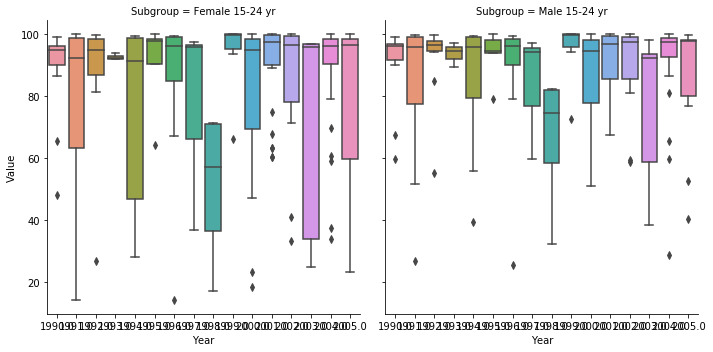

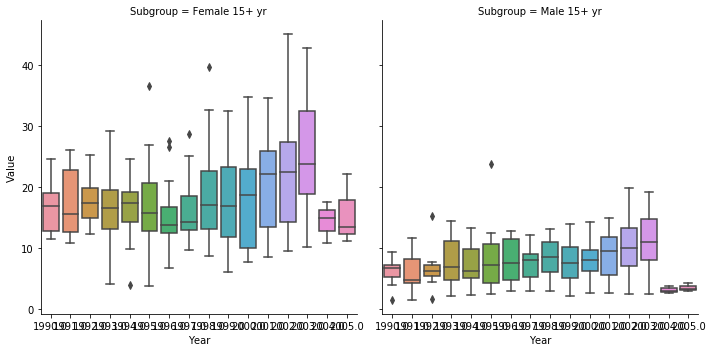

In [22]:
sns.catplot(x="Year", y= "Value", col= "Subgroup",kind="box", data= literacy)
sns.catplot(x="Year", y= "Value", col= "Subgroup",kind="box", data= employment)

To further research this topic I would look into a few different factors I believe could make a difference in literacy and employment: 
1. Household size- number of children
2. Household income
3. Break it down by city vs rural and see it that effects the rates
4. Education level of the parents
5. Religion
By researching these factors more deeply it would allow us to make a stronger statement on the difference in literacy vs work. Using different means of collection would help provide information, however a census I think woud be the most reliable form of information. 

To keep information accurate across the genders and years I would make sure that the count for all recieved data is the same as too avoid skewed data. Complete gathering the data at the completion of each calendar year to keep the data